In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
Y_train.shape

(50000, 1)

In [12]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
Y_train = Y_train.reshape(-1,)

In [14]:
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
Y_test = Y_test.reshape(-1,)

In [25]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [26]:
def plot_sample(X,Y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

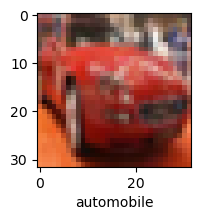

In [27]:
plot_sample(X_train, Y_train, 5)

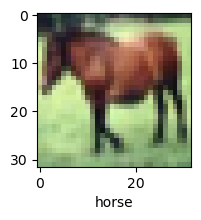

In [28]:
plot_sample(X_train,Y_train,7)

In [29]:
X_train = X_train / 255.0

In [30]:
X_test = X_test / 255.0

In [33]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10,activation = 'softmax'),
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8097 - accuracy: 0.3560
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6187 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5386 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 91s 59ms/step - loss: 1.4803 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4285 - accuracy: 0.4966


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.63      0.57      1000
           1       0.70      0.53      0.60      1000
           2       0.44      0.24      0.31      1000
           3       0.37      0.40      0.38      1000
           4       0.38      0.50      0.43      1000
           5       0.50      0.27      0.35      1000
           6       0.46      0.65      0.54      1000
           7       0.56      0.56      0.56      1000
           8       0.59      0.64      0.62      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



In [41]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

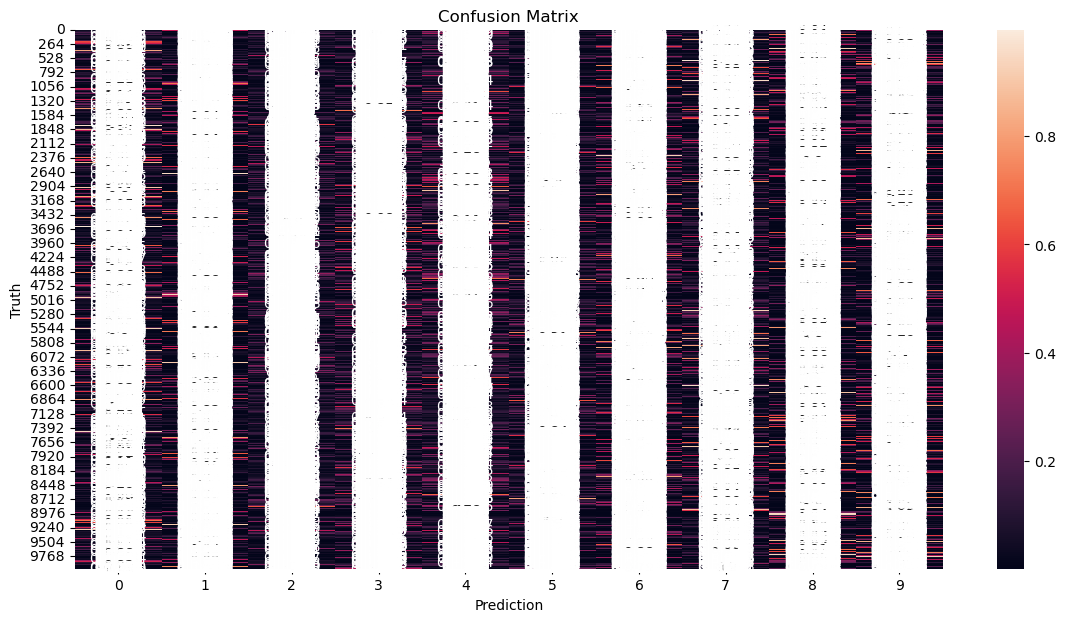

In [42]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [45]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    
])

In [48]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [50]:
cnn.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4902 - accuracy: 0.4652
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1419 - accuracy: 0.5990
Epoch 3/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0161 - accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9364 - accuracy: 0.6758
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8726 - accuracy: 0.6963
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8235 - accuracy: 0.7134
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7778 - accuracy: 0.7291
Epoch 8/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.7448 - accuracy: 0.7397
Epoch 9/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7093 - accuracy: 0.7525
Epoch 10/10
1563/1563 [==============================] - 29s 18m

In [51]:
cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9261 - accuracy: 0.6979


[0.9261355400085449, 0.6978999972343445]

In [52]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[1.5101650e-03, 2.4471732e-04, 1.7715900e-03, 9.0204811e-01,
        4.5020151e-04, 4.0504124e-02, 3.4418911e-02, 2.8708926e-05,
        1.8350558e-02, 6.7295023e-04],
       [2.5700830e-04, 6.4707953e-03, 5.2241847e-07, 2.0188369e-07,
        1.4132066e-06, 1.6457353e-09, 5.0845701e-09, 2.7123502e-07,
        9.9284267e-01, 4.2718675e-04],
       [1.9863725e-01, 4.8007187e-01, 3.8671729e-03, 7.0176981e-03,
        4.1864528e-03, 7.0089160e-04, 9.0956734e-04, 1.4236755e-02,
        1.9825546e-01, 9.2116870e-02],
       [9.1883570e-01, 4.9168388e-03, 8.3180139e-04, 1.5096426e-04,
        1.7714137e-03, 6.7346677e-06, 1.9040795e-05, 2.5225594e-04,
        7.1230203e-02, 1.9850379e-03],
       [6.6764881e-07, 3.4926674e-07, 1.3307650e-02, 6.4669107e-03,
        2.2258191e-01, 2.0801723e-03, 7.5555825e-01, 3.6233325e-06,
        4.6034364e-07, 1.1147123e-08]], dtype=float32)

In [53]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [54]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

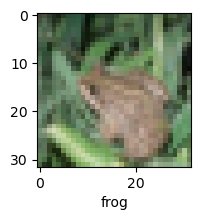

In [55]:
plot_sample(X_test, Y_test, 4)

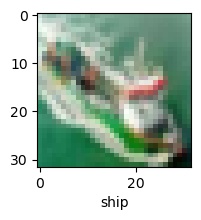

In [67]:
plot_sample(X_test, Y_test, 15)

In [70]:
classes[y_classes[4]]

'frog'